<a href="https://colab.research.google.com/github/ankit986/ACM-WH/blob/ankit/Ankit_IPL_T20_Cricket_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008. </b>

## <b> Explore and analyze the data to discover results and statistics for different teams playing in IPL. </b>

In [1]:
!pip install geopandas

     |████████████████████████████████| 1.0MB 5.1MB/s 
     |████████████████████████████████| 6.5MB 16.3MB/s 
     |████████████████████████████████| 15.3MB 252kB/s 


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
# by ankit

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
folder_path = '/content/drive/MyDrive/AlmaBetter/Capstone Projects/EDA/IPL/data'

In [5]:
fp = f"/content/drive/MyDrive/AlmaBetter/Capstone Projects/EDA/IPL/igismap/Indian_States.shp"
map_df = gpd.read_file(fp)

In [6]:
players_df = pd.read_excel(folder_path+'/Players.xlsx')
deliveries_df = pd.read_csv(folder_path+'/deliveries.csv')
matches_df = pd.read_csv(folder_path+'/matches.csv')
most_runs_avg_sr_df = pd.read_csv(folder_path+'/most_runs_average_strikerate.csv')
teams_df = pd.read_csv(folder_path+'/teams.csv')
teamwise_home_and_away_df = pd.read_csv(folder_path+'/teamwise_home_and_away.csv')

In [7]:
players_df.head()

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India
3,A Choudhary,NaT,Right_hand,Left-arm fast-medium,NaN
4,A Dananjaya,NaT,Right_Hand,Right-arm offbreak,NaN


In [8]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [9]:
deliveries_df.shape

(179078, 21)

In [10]:
matches_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [11]:
most_runs_avg_sr_df

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881
...,...,...,...,...,...,...
511,ND Doshi,0,1,13,0.000000,0.000000
512,J Denly,0,1,1,0.000000,0.000000
513,S Ladda,0,2,9,0.000000,0.000000
514,V Pratap Singh,0,1,1,0.000000,0.000000


In [12]:
teams_df

,team1
0,Pune Warriors
1,Kolkata Knight Riders
2,Rajasthan Royals
3,Kochi Tuskers Kerala
4,Gujarat Lions
5,Chennai Super Kings
6,Rising Pune Supergiants
7,Delhi Daredevils
8,Deccan Chargers
9,Delhi Capitals


In [13]:
teamwise_home_and_away_df.head()

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222


In [14]:
old_team_name_new_name_dict = {'Deccan Chargers' :'Sunrisers Hyderabad', 'Pune Warriors': 'Rising Pune Supergiant', 'Rising Pune Supergiants':'Rising Pune Supergiant','Delhi Daredevils':'Delhi Capitals'}

old_stad_new_stad_dict = {
    'M Chinnaswamy Stadium':'M. Chinnaswamy Stadium', 
    'IS Bindra Stadium':'Punjab Cricket Association IS Bindra Stadium',
    'Punjab Cricket Association Stadium, Mohali':'Punjab Cricket Association IS Bindra Stadium', 
    'Punjab Cricket Association IS Bindra Stadium, Mohali':'Punjab Cricket Association IS Bindra Stadium', 
    'Rajiv Gandhi Intl. Cricket Stadium':'Rajiv Gandhi International Stadium, Uppal', 
    'Feroz Shah Kotla':'Feroz Shah Kotla Ground',
    'Subrata Roy Sahara Stadium':'Maharashtra Cricket Association Stadium',
    'ACA-VDCA Stadium':'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
    'MA Chidambaram Stadium, Chepauk':'M. A. Chidambaram Stadium'
  }


old_city_new_city_dict = {
    'Bengaluru':'Bangalore',
    'Mohali':'Chandigarh'
  }


def change_name(team_name, old_name_new_name_dict):
    if team_name in old_name_new_name_dict.keys():
        return old_name_new_name_dict[team_name]
    return team_name

for column in ['batting_team','bowling_team']: 
  deliveries_df[column] = deliveries_df[column].apply(lambda x: change_name(x, old_team_name_new_name_dict))

teamwise_home_and_away_df['team'] = teamwise_home_and_away_df['team'].apply(lambda x: change_name(x, old_team_name_new_name_dict))

for column in ['team1','team2','toss_winner','winner']: 
  matches_df[column] = matches_df[column].apply(lambda x: change_name(x, old_team_name_new_name_dict))

teams_df['team1'] = teams_df.team1.apply(lambda x: change_name(x, old_team_name_new_name_dict)).drop_duplicates()
teams_df.dropna(inplace=True)
teams_df.reset_index(inplace=True)
teams_df.drop(columns='index', inplace=True)

matches_df['venue'] = matches_df['venue'].apply(lambda x: change_name(x, old_stad_new_stad_dict))
matches_df['city'] = matches_df['city'].apply(lambda x: change_name(x, old_city_new_city_dict))



In [15]:
players_df.fillna(value='NA', inplace=True)

x = matches_df['Season'][0]
ls = []
i=0
for season in matches_df['Season']:
  if x == season:
    i+=1
    ls.append(i)
  else:
    x=season
    i=1
    ls.append(i)
    
matches_df = pd.concat([matches_df,pd.DataFrame({'match_number':ls})],axis=1)

In [16]:
drop_index_for_matches_df = matches_df[matches_df.winner.isna()].index
matches_df.drop(index=drop_index_for_matches_df, inplace=True)

drop_match_id_for_deliveries_df = matches_df.iloc[matches_df[matches_df.winner.isna()].index].id.values
for m_id in drop_match_id_for_deliveries_df:
    drop_index_for_deliveries_df = deliveries_df[deliveries_df.match_id == m_id].index 
    deliveries_df.drop(index=drop_index_for_deliveries_df, inplace =True)
print('matches_df Shape: ',matches_df.shape)
print('deliveries_df Shape: ',deliveries_df.shape)

matches_df Shape:  (752, 19)
deliveries_df Shape:  (179078, 21)


Creating Score Card 


In [17]:
def get_match_deliveries(match_id):
  return deliveries_df[deliveries_df['match_id'] == match_id]


def create_inning_scorecard(batsman_run_ball_dict, bowler_detail_dict):
  bowler_list = []
  batsman_list = []
 
  for batsman in batsman_run_ball_dict :

    batsman_dict = batsman_run_ball_dict[batsman]
    temp_dict = {'batsman': batsman, 'runs': batsman_dict['run'], 'ball':batsman_dict['bowls_played'], 'strike_rate': batsman_dict['strike_rate']}
    batsman_list.append(temp_dict)

  
  for bowler in bowler_detail_dict :
 
    bowler_dict = bowler_detail_dict[bowler]
    temp_dict = {'bowler': bowler, 'over':bowler_dict['overs'],'runs': bowler_dict['runs_given'], 'wickets':len(bowler_dict['wicket_took']), 'economy': bowler_dict['eco']}
    bowler_list.append(temp_dict)



  final_batsman_df = pd.DataFrame(batsman_list)
  final_bowler_df = pd.DataFrame(bowler_list)

  return final_batsman_df, final_bowler_df


def get_overs_stats(inning):
    temp_df = copy.deepcopy(inning)
    temp_df['player_dismissed'] = temp_df['player_dismissed'].apply(lambda x: 1 if x == x else 0)
    over_runs_wickets = temp_df.groupby('over', as_index = False).agg({'total_runs':'sum','player_dismissed':'sum'})
    
    runs = 0
    new_col = []
    for index, row in over_runs_wickets.iterrows():
        new_col.append(runs + row['total_runs'])
        runs = new_col[-1]
    over_runs_wickets['score'] = pd.Series(new_col)

    return over_runs_wickets



def get_batsman_bowler_details(inning):
  batsman_run_ball_dict = {}
  bowler_detail_dict = {}
  wickets_fall = 0
  extra_balls = 0
  overs_stats = get_overs_stats(inning[['over','total_runs','player_dismissed']])

  for index, row in inning.iterrows():
      
      batsman = row['batsman']
      run = row['batsman_runs']
      total_runs = row['total_runs']

      bowler = row['bowler']
      wicket = row['player_dismissed']
      wicket_kind = row['dismissal_kind']

      if row.wide_runs!= 0 or row.noball_runs!=0:
          extra_balls += 1

      if batsman in batsman_run_ball_dict:
        batsman_run_ball_dict[batsman]['run'] += run
        batsman_run_ball_dict[batsman]['bowls_played'] += 1     
      else:
        batsman_run_ball_dict[batsman] = {'run':run, 'bowls_played':1}
    

      if bowler in bowler_detail_dict:
        bowler_detail_dict[bowler]['bowls_bowled'] += 1
        bowler_detail_dict[bowler]['runs_given'] += total_runs
      else:
        bowler_detail_dict[bowler] = {'runs_given':total_runs, 'bowls_bowled':1, 'wicket_took':[]}

      if wicket == wicket and wicket_kind not in ['run out', 'retired hurt','obstructing the field']:
        bowler_detail_dict[bowler]['wicket_took'].append(wicket)
        wickets_fall += 1
      elif wicket_kind in ['run out', 'retired hurt', 'obstructing the field']:
        wickets_fall += 1

  for batsman in batsman_run_ball_dict:
    batsman_dict = batsman_run_ball_dict[batsman]
    strike_rate = int(batsman_dict['run'])/int(batsman_dict['bowls_played'])*100
    batsman_dict['strike_rate'] = round(strike_rate,2)


  for bowler in bowler_detail_dict:
    bowler_dict = bowler_detail_dict[bowler]
    eco = bowler_dict['runs_given']*6/bowler_dict['bowls_bowled']
    bowler_dict['eco'] = round(eco,2)

    overs = str(bowler_dict['bowls_bowled']//6)+'.'+str(bowler_dict['bowls_bowled']%6)
    bowler_dict['overs'] = overs

  return create_inning_scorecard(batsman_run_ball_dict, bowler_detail_dict), wickets_fall, overs_stats, extra_balls



def get_scorecard(match_id):
    delivery_df = deliveries_df[deliveries_df['match_id'] == match_id]
    inning_one_df = delivery_df[delivery_df['inning']==1]
    inning_two_df = delivery_df[delivery_df['inning']==2]
    inn_1, inn_2 = {}, {}

    inn_1['scorecard'], wickets_1, overs_stats_1, extra_balls = get_batsman_bowler_details(inning_one_df)
    temp_list = (str(inn_1['scorecard'][1]['over'].astype('float').sum())).split('.')
    print('temp_list:',temp_list)
    print('temp_list:',extra_balls)
    temp = (int(temp_list[0])*6 + int(temp_list[1])) - extra_balls
    temp = temp//6 + (temp%6)*0.1
    inn_1['overs'] = round(temp,1)
    inn_1['runs'] = inn_1['scorecard'][1]['runs'].sum()

    inn_2['scorecard'], wickets_2, overs_stats_2, extra_balls = get_batsman_bowler_details(inning_two_df)
    temp_list = (str(inn_2['scorecard'][1]['over'].astype('float').sum())).split('.')
    temp = (int(temp_list[0])*6 + int(temp_list[1])) - extra_balls
    temp = temp//6 + (temp%6)*0.1
    inn_2['overs'] =  round(temp,1)
    inn_2['runs'] = inn_2['scorecard'][1]['runs'].sum()


    return inn_1, wickets_1, inn_2, wickets_2, overs_stats_1, overs_stats_2



def scorecard(inning):
    global inn_1, wickets_1, inn_2, wickets_2, overs_stats_1, overs_stats_2, team1, team2

    team1, team2 = matches_df[matches_df.id==match_id]['team1'].values[0], matches_df[matches_df.id==match_id]['team2'].values[0]

    inn_1, wickets_1, inn_2, wickets_2, overs_stats_1, overs_stats_2 = get_scorecard(match_id)

    if inning==1:
        print('\033[1m***********'*4,'\n\t\t Inning: 1\n'+'***********'*4)
        print(f'{team1}\n'+'***********'*4)
        print('| Score: '+str(inn_1['runs'])+'/'+str(wickets_1),'| Target: '+str(inn_1['runs']+1)+' | Overs:',inn_1['overs'],'|') 
        print('\n\033[1mScorecard: ')
        return pd.concat([inn_1['scorecard'][0], inn_1['scorecard'][1]], axis=1).fillna(' ')

    elif inning==2:
        print('\033[1m***********'*4,'\n\t\tInning: 2\n'+'***********'*4)
        print(f'{team2}\n'+'***********'*4)
        print('| Score: '+str(inn_2['runs'])+'/'+str(wickets_2),'| Target: '+str(inn_1['runs']+1)+' | Overs:',inn_2['overs'],'|')
        print('\n\033[1mScorecard: ')
        return pd.concat([inn_2['scorecard'][0], inn_2['scorecard'][1]], axis=1).fillna(' ')
    else:
        return None


In [18]:
def get_match_deliveries(match_id):
  return deliveries_df[deliveries_df['match_id'] == match_id]

In [19]:
def create_inning_scorecard(batsman_run_ball_dict, bowler_detail_dict):
  # print(batsman_run_ball_dict)
  # print(bowler_detail_dict)

  # sorted_batsman_list = sorted([[value['run'], key, value['bowls_played']]
  # for (key, value) in batsman_run_ball_dict.items()], reverse=True)

  # sorted_bowler_list = sorted([[len(value['wicket_took']), key, value['runs_given'], f"{value['bowls_bowled']//6}.{value['bowls_bowled']%6}"]
  # for (key, value) in bowler_detail_dict.items()], reverse=True)

  bowler_list = []
  batsman_list = []
 
  for batsman in batsman_run_ball_dict :

    batsman_dict = batsman_run_ball_dict[batsman]
    temp_dict = {'batsman': batsman, 'runs': batsman_dict['run'], 'ball':batsman_dict['bowls_played'], 'strike_rate': batsman_dict['strike_rate']}
    batsman_list.append(temp_dict)

  
  for bowler in bowler_detail_dict :
 
    bowler_dict = bowler_detail_dict[bowler]
    temp_dict = {'bowler': bowler, 'over':bowler_dict['overs'],'runs': bowler_dict['runs_given'], 'wickets':len(bowler_dict['wicket_took']), 'economy': bowler_dict['eco']}
    bowler_list.append(temp_dict)



  final_batsman_df = pd.DataFrame(batsman_list)
  final_bowler_df = pd.DataFrame(bowler_list)

  return final_batsman_df, final_bowler_df


In [20]:
deliveries_df[deliveries_df.match_id == 56].head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
12998,56,1,Rising Pune Supergiant,Mumbai Indians,1,1,AM Rahane,RA Tripathi,MJ McClenaghan,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [21]:
import copy
def get_overs_stats(inning):
    temp_df = copy.deepcopy(inning)
    temp_df['player_dismissed'] = temp_df['player_dismissed'].apply(lambda x: 1 if x == x else 0)
    over_runs_wickets = temp_df.groupby('over', as_index = False).agg({'total_runs':'sum','player_dismissed':'sum'})
    
    runs = 0
    new_col = []
    for index, row in over_runs_wickets.iterrows():
        new_col.append(runs + row['total_runs'])
        runs = new_col[-1]
    over_runs_wickets['score'] = pd.Series(new_col)

  #over_runs_wickets['wickets'] = temp_df.groupby('over')['player_dismissed'].sum()
    return over_runs_wickets

In [22]:

def get_batsman_bowler_details(inning):
  batsman_run_ball_dict = {}
  bowler_detail_dict = {}
  wickets_fall = 0

  overs_stats = get_overs_stats(inning[['over','total_runs','player_dismissed']])

  for index, row in inning.iterrows():
      batsman = row['batsman']
      run = row['batsman_runs']
      total_runs = row['total_runs']
     
      if row['wide_runs'] !=0 or row['noball_runs'] != 0:
        bowl_to_add = 0
      else:
        bowl_to_add = 1

      bowler = row['bowler']
      wicket = row['player_dismissed']
      wicket_kind = row['dismissal_kind']

      if batsman in batsman_run_ball_dict:
    #     old_run = batsman_run_ball_dict[batsman]['run']
    #     old_bowls_played = batsman_run_ball_dict[batsman]['bowls_played']
    #     batsman_run_ball_dict[batsman] = {'run':old_run+run, 'bowls_played':old_bowls_played+bowl_to_add}
        batsman_run_ball_dict[batsman]['run'] += run
        batsman_run_ball_dict[batsman]['bowls_played'] += bowl_to_add     
      else:
        batsman_run_ball_dict[batsman] = {'run':run, 'bowls_played':1}
    

      if bowler in bowler_detail_dict:
        # old_run_given = bowler_detail_dict[bowler]['runs_given']
        # old_bowls_bowled = bowler_detail_dict[bowler]['bowls_bowled']
        bowler_detail_dict[bowler]['bowls_bowled'] += bowl_to_add
        bowler_detail_dict[bowler]['runs_given'] += total_runs
      else:
        bowler_detail_dict[bowler] = {'runs_given':total_runs, 'bowls_bowled':bowl_to_add, 'wicket_took':[]}

      if wicket == wicket and wicket_kind not in ['run out', 'retired hurt', 'obstructing the field']:
        bowler_detail_dict[bowler]['wicket_took'].append(wicket)
        wickets_fall += 1
      elif wicket_kind in ['run out', 'retired hurt', 'obstructing the field']:
        wickets_fall += 1

  for batsman in batsman_run_ball_dict:
    batsman_dict = batsman_run_ball_dict[batsman]
    strike_rate = int(batsman_dict['run'])/int(batsman_dict['bowls_played'])*100
    batsman_dict['strike_rate'] = round(strike_rate,2)


  for bowler in bowler_detail_dict:
    bowler_dict = bowler_detail_dict[bowler]
    eco = bowler_dict['runs_given']*6/bowler_dict['bowls_bowled']
    bowler_dict['eco'] = round(eco,2)

    overs = str(bowler_dict['bowls_bowled']//6)+'.'+str(bowler_dict['bowls_bowled']%6)
    bowler_dict['overs'] = overs


  # return batsman_run_ball_dict,  bowler_detail_dict
  return create_inning_scorecard(batsman_run_ball_dict, bowler_detail_dict), wickets_fall, overs_stats


In [23]:
def get_scorecard(match_id):
  delivery_df = deliveries_df[deliveries_df['match_id'] == match_id]
  inning_one_df = delivery_df[delivery_df['inning']==1]
  inning_two_df = delivery_df[delivery_df['inning']==2]
  inn_1, inn_2 = {}, {}

  match_details = matches_df[matches_df['id'] == match_id]
  team1 = match_details['team1'].values[0]
  team2 = match_details['team2'].values[0]
  winner = match_details['winner'].values[0]

  if match_details['dl_applied'].values[0] == 1:
      if match_details['win_by_runs'].values[0] > 0:
        win_by_runs = match_details['win_by_runs'].values[0]
        result = (f"Duckworth-Lewis-Stern Applied: Yes\nMatch Played between {team1} and {team2}\n{winner} wins the match by {win_by_runs} runs\n")
      else:
        win_by_wickets = match_details['win_by_wickets'].values[0]
        result = (f"Duckworth-Lewis-Stern Applied: Yes\nMatch Played between {team1} and {team2}\n{winner} wins the match by {win_by_wickets} runs\n")  
  else:
      if match_details['win_by_runs'].values[0] > 0:
        win_by_runs = match_details['win_by_runs'].values[0]
        result = (f"Duckworth-Lewis-Stern Applied: No\nMatch Played between {team1} and {team2}\n{winner} wins the match by {win_by_runs} runs\n")
      else:
        win_by_wickets = match_details['win_by_wickets'].values[0]
        result = (f"Duckworth-Lewis-Stern Applied: No\nMatch Played between {team1} and {team2}\n{winner} wins the match by {win_by_wickets} runs\n")


  inn_1['scorecard'], wickets_1, overs_stats_1 = get_batsman_bowler_details(inning_one_df)
  inn_1['overs'] =  (inn_1['scorecard'][1]['over']).astype('float').sum()
  inn_1['runs'] = inn_1['scorecard'][1]['runs'].sum()

  inn_2['scorecard'], wickets_2, overs_stats_2 = get_batsman_bowler_details(inning_two_df)
  inn_2['overs'] =  (inn_2['scorecard'][1]['over']).astype('float').sum()
  inn_2['runs'] = inn_2['scorecard'][1]['runs'].sum()


  return inn_1, wickets_1, inn_2, wickets_2, result, overs_stats_1, overs_stats_2
  #return get_batsman_bowler_details(inning_one_df), get_batsman_bowler_details(inning_two_df)  


In [24]:
inn_1, wickets_1, inn_2, wickets_2, match_result, overs_stats_1, overs_stats_2 = get_scorecard(78)
print('**********'*4,'\n\t\tInning: 1\n'+'**********'*4)
print('|  Score: '+str(inn_1['runs'])+'/'+str(wickets_1),' |\t|  Overs:',inn_1['overs'],' |') # Add wickets as well
print('Scorecard: ')
inn_1['scorecard'][0]

**************************************** 
		Inning: 1
****************************************
|  Score: 196/7  |	|  Overs: 20.0  |
Scorecard: 


,batsman,runs,ball,strike_rate
0,GC Smith,2,7,28.57
1,SA Asnodkar,60,34,176.47
2,M Kaif,21,18,116.67
3,YK Pathan,55,31,177.42
4,SR Watson,0,1,0.00
5,RA Jadeja,33,19,173.68
6,SK Warne,7,8,87.50
7,Sohail Tanvir,3,2,150.00
8,M Rawat,1,1,100.00


[Text(0, 0.5, 'Runs v/s Balls'),
 Text(0.5, 0, 'Batsman'),
 Text(0.5, 1.0, 'Batting Statistics'),
 None]

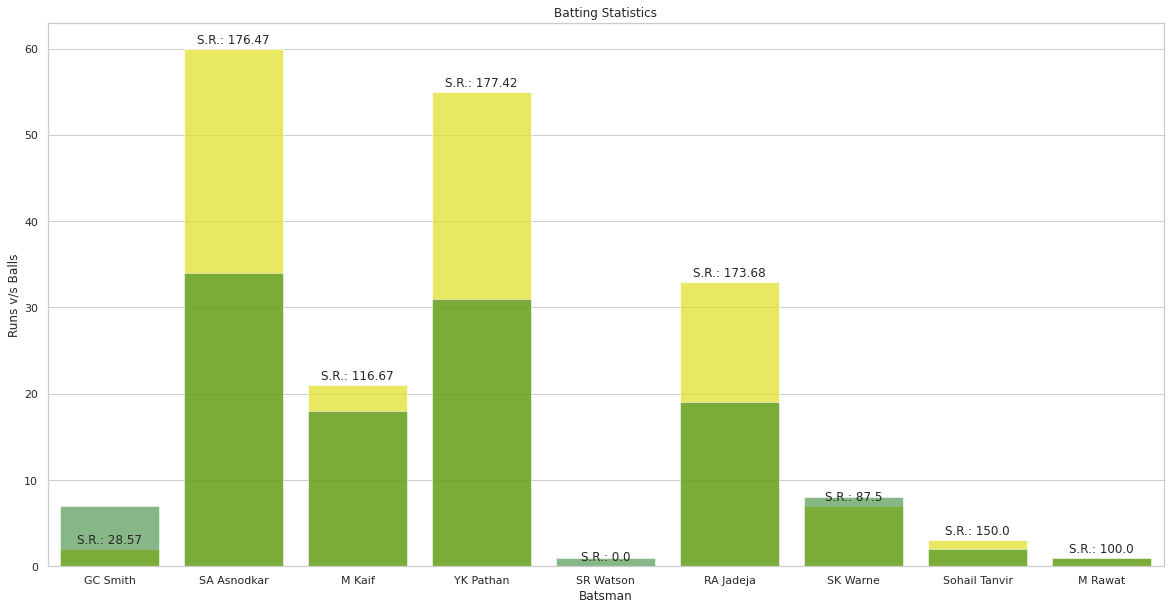

In [25]:
sns.set_theme(style="whitegrid")

ax = plt.figure(figsize=(20,10))

inn1_df = inn_1['scorecard'][0]
ax = sns.barplot(data = inn1_df, x = 'batsman', y = 'runs', color = 'yellow',alpha=0.7)
ax = sns.barplot(data = inn1_df, x = 'batsman', y = 'ball', color = 'green',alpha=0.5)
#plt.ax.bar(alpha=0.1)
# for rate in inn1_df['strike_rate']:
#     ax.text(ax.patches.get_x(), inn1_df.runs+5,rate,color='black', ha='center')

for p, rate in zip(ax.patches, inn1_df['strike_rate']):
    ax.annotate(format('S.R.: '+str(rate)), (p.get_x() + p.get_width() / 2.,p.get_height()),
               ha = 'center', va = 'center',xytext=(0,9),
               textcoords = 'offset points')

ax.set(xlabel = 'Batsman',ylabel = 'Runs v/s Balls', title = 'Batting Statistics',alpha=np.random.rand())

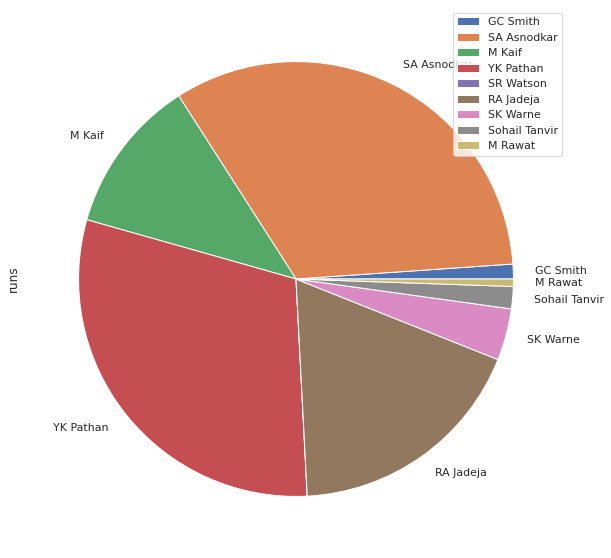

In [26]:
inn1_df.set_index('batsman').plot.pie(y = 'runs',figsize=(10,10))

In [27]:
inn_1['scorecard'][1]

,bowler,over,runs,wickets,economy
0,AB Dinda,4.0,30,0,7.5
1,I Sharma,4.0,28,1,7.0
2,AB Agarkar,4.0,46,1,11.5
3,Umar Gul,4.0,36,3,9.0
4,DJ Hussey,2.0,26,0,13.0
5,SC Ganguly,1.0,14,0,14.0
6,LR Shukla,1.0,16,1,16.0


[Text(0, 0.5, 'Runs v/s Economy'),
 Text(0.5, 0, 'Bowlers'),
 Text(0.5, 1.0, 'Bowling Statistics')]

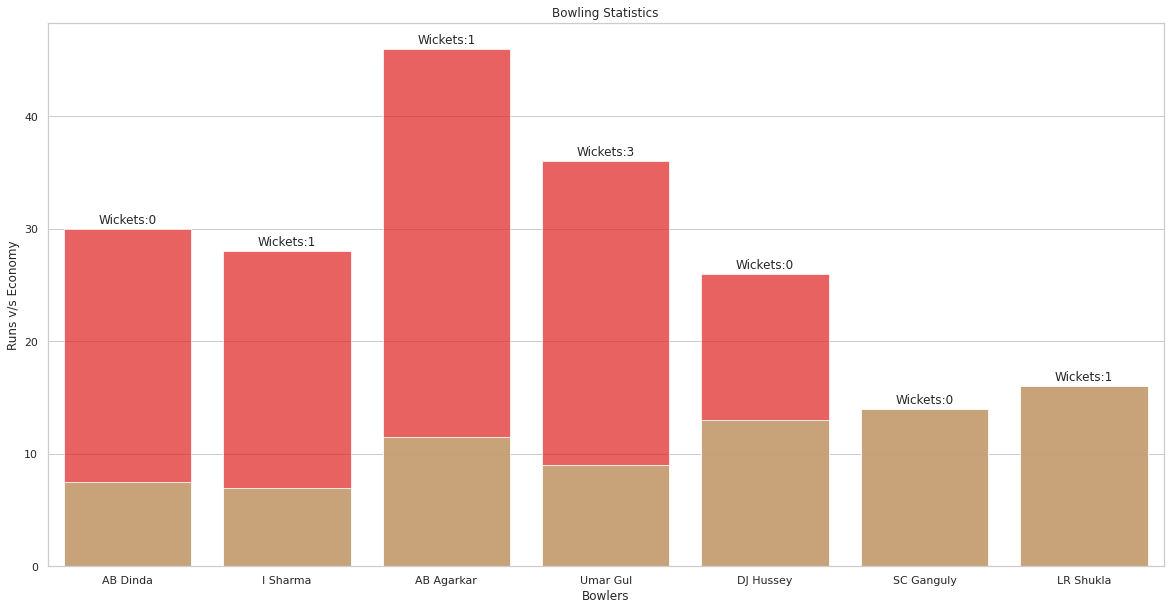

In [28]:
sns.set_theme(style="whitegrid")

ax = plt.figure(figsize=(20,10))

inn1_df = inn_1['scorecard'][1]
ax = sns.barplot(data = inn1_df, x = 'bowler', y = 'runs', color= 'red',alpha=0.7)
ax = sns.barplot(data = inn1_df, x = 'bowler', y = 'economy', color = 'y',alpha=0.8)

# for rate in inn1_df['strike_rate']:
#     ax.text(ax.patches.get_x(), inn1_df.runs+5,rate,color='black', ha='center')

for p, eco in zip(ax.patches, inn1_df['wickets']):
    ax.annotate(format('Wickets:'+str(eco)), (p.get_x() + p.get_width() / 2.,p.get_height()),
               ha = 'center', va = 'center',xytext=(0,9),
               textcoords = 'offset points')

ax.set(xlabel = 'Bowlers',ylabel = 'Runs v/s Economy', title = 'Bowling Statistics')

In [29]:
overs_stats_2.head()

,over,total_runs,player_dismissed,score
0,1,9,0,9
1,2,13,1,22
2,3,9,0,31
3,4,8,0,39
4,5,5,1,44


[Text(0, 0.5, 'Runs'), Text(0.5, 0, 'Overs'), Text(0.5, 1.0, 'Runs Per Over')]

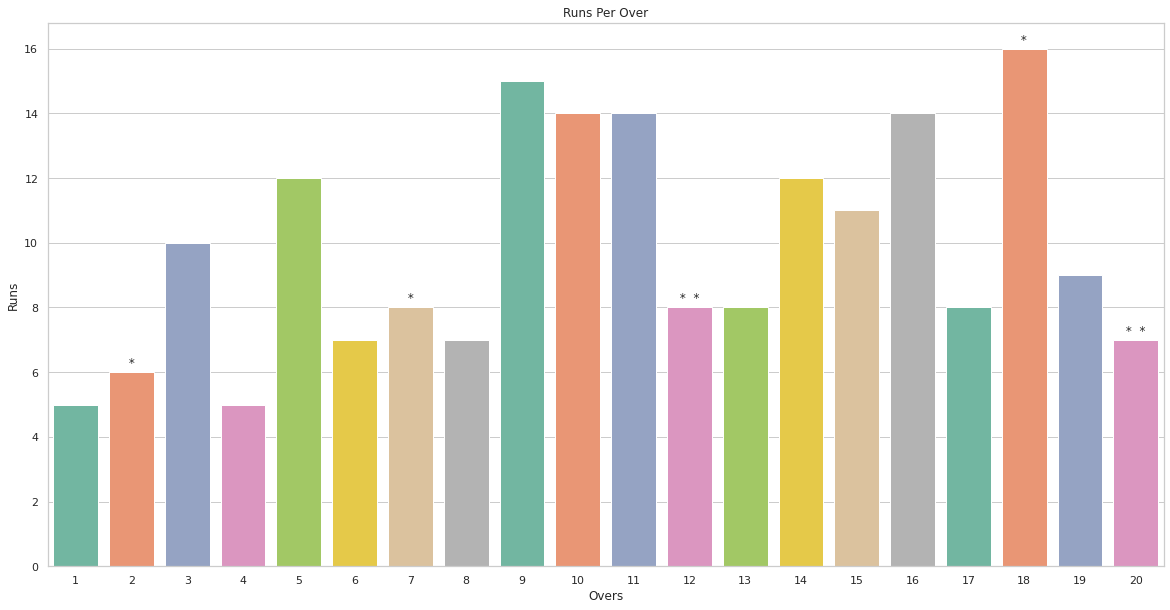

In [30]:
sns.set_theme(style="whitegrid")

ax = plt.figure(figsize=(20,10))

overs_stats_df = overs_stats_1
ax = sns.barplot(data = overs_stats_df, x = 'over', y = 'total_runs', palette= 'Set2')
#ax = sns.barplot(data = inn1_df, x = 'bowler', y = 'economy', color = 'y')

# for rate in inn1_df['strike_rate']:
#     ax.text(ax.patches.get_x(), inn1_df.runs+5,rate,color='black', ha='center')

for p, wickets in zip(ax.patches, overs_stats_df['player_dismissed']):
    ax.annotate(' * '*wickets, (p.get_x() + p.get_width() / 2.,p.get_height()),
               ha = 'center', va = 'center',xytext=(0,9),
               textcoords = 'offset points')

ax.set(xlabel = 'Overs',ylabel = 'Runs', title = 'Runs Per Over')

In [31]:
print('**********'*4,'\n\t\tInning: 2\n'+'**********'*4)
print('|  Score: '+str(inn_2['runs'])+'/'+str(wickets_2),' |\t|  Overs:',inn_2['overs'],' |') # Add wickets as well
print('Scorecard: ')
inn_2['scorecard'][0]

**************************************** 
		Inning: 2
****************************************
|  Score: 151/10  |	|  Overs: 19.1  |
Scorecard: 


,batsman,runs,ball,strike_rate
0,Salman Butt,7,7,100.00
1,SC Ganguly,51,40,127.50
2,AB Agarkar,20,14,142.86
3,BJ Hodge,1,3,33.33
4,DJ Hussey,42,30,140.00
5,LR Shukla,2,2,100.00
6,DB Das,11,13,84.62
7,WP Saha,1,2,50.00
8,Umar Gul,2,2,100.00
9,AB Dinda,1,3,33.33


[Text(0, 0.5, 'Runs v/s Balls'),
 Text(0.5, 0, 'Batsman'),
 Text(0.5, 1.0, 'Batting Statistics')]

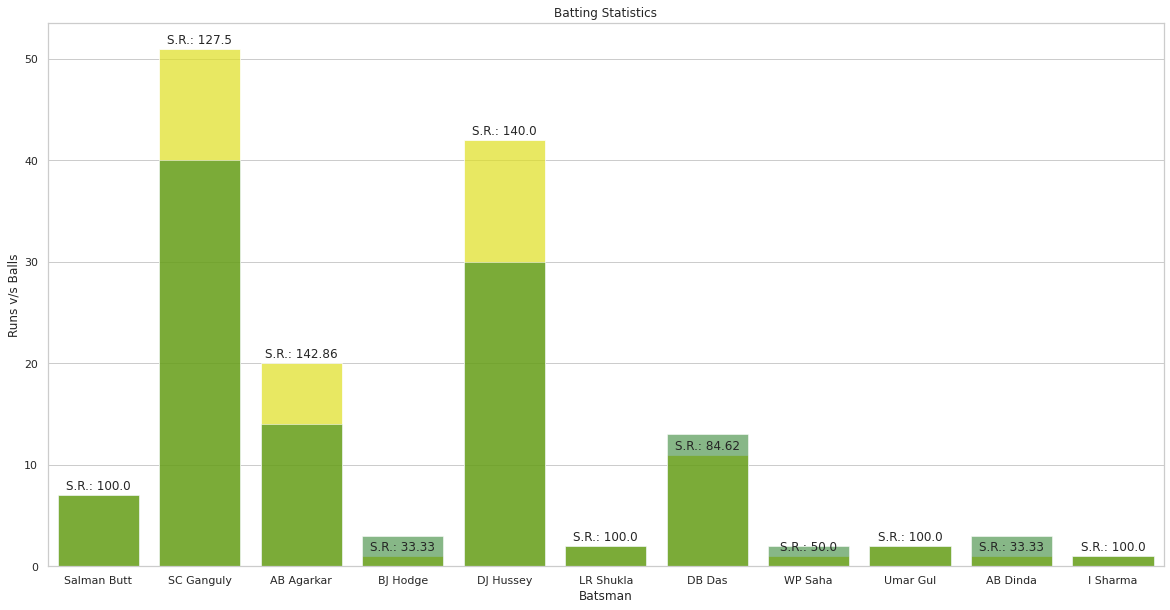

In [32]:
sns.set_theme(style="whitegrid")

inn2_df = inn_2['scorecard'][0]
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data = inn2_df, x = 'batsman', y = 'runs', color = 'yellow',alpha=0.7)
ax = sns.barplot(data = inn2_df, x = 'batsman', y = 'ball', color = 'green',alpha=0.5)


for p, rate in zip(ax.patches, inn2_df['strike_rate']):
    ax.annotate(format('S.R.: '+str(rate)), (p.get_x() + p.get_width() / 2.,p.get_height()),
               ha = 'center', va = 'center',xytext=(0,9),
               textcoords = 'offset points')


ax.set(xlabel = 'Batsman',ylabel = 'Runs v/s Balls', title = 'Batting Statistics')


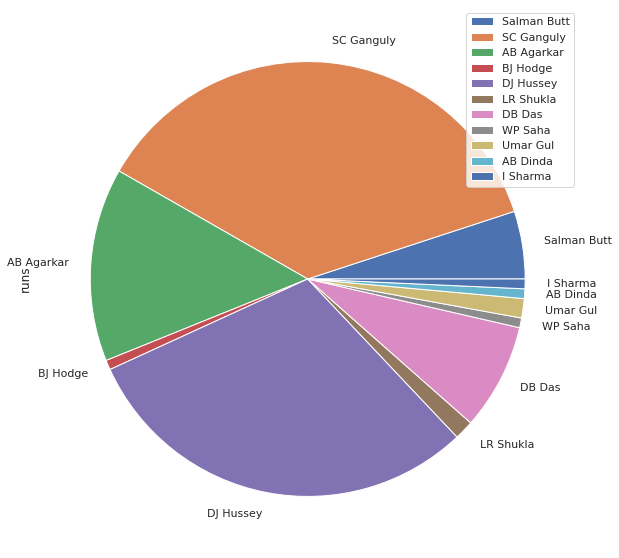

In [33]:
fig = inn2_df.set_index('batsman').plot.pie(y = 'runs',figsize=(10,10))

In [34]:
inn_2['scorecard'][1]

,bowler,over,runs,wickets,economy
0,SR Watson,3.1,23,2,7.26
1,Sohail Tanvir,4.0,32,2,8.00
2,SK Trivedi,4.0,31,2,7.75
3,MM Patel,4.0,30,0,7.50
4,SK Warne,2.0,20,1,10.00
5,YK Pathan,2.0,15,0,7.50


[Text(0, 0.5, 'Runs v/s Economy'),
 Text(0.5, 0, 'Bowlers'),
 Text(0.5, 1.0, 'Bowling Statistics')]

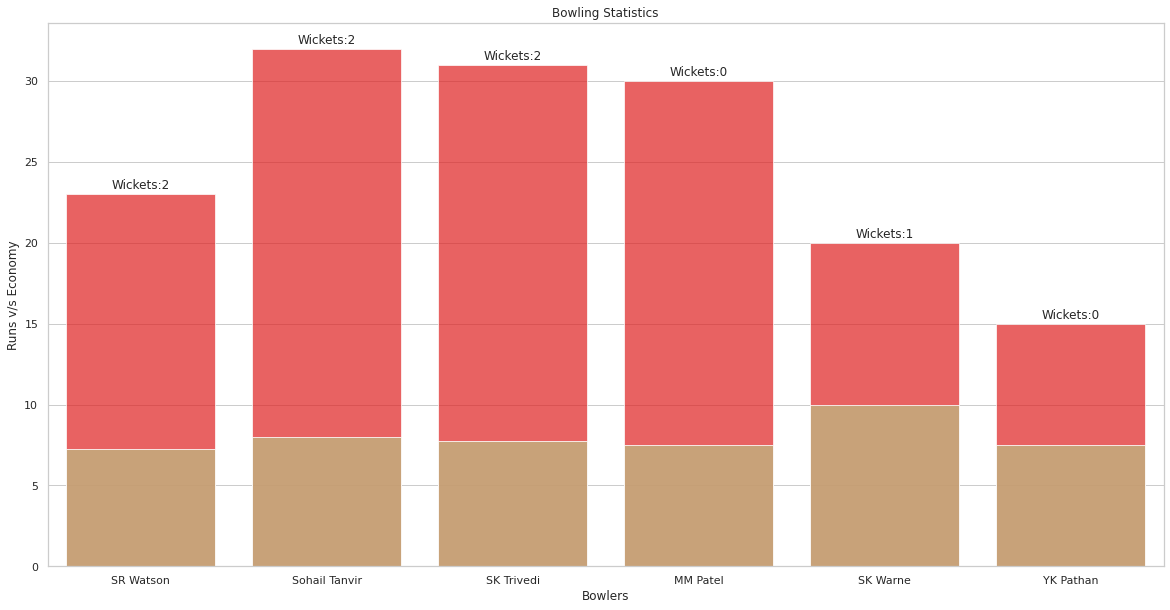

In [35]:
sns.set_theme(style="whitegrid")

ax = plt.figure(figsize=(20,10))

inn2_df = inn_2['scorecard'][1]
ax = sns.barplot(data = inn2_df, x = 'bowler', y = 'runs', color= 'red',alpha=0.7)
ax = sns.barplot(data = inn2_df, x = 'bowler', y = 'economy', color = 'y',alpha=0.8)

# for rate in inn1_df['strike_rate']:
#     ax.text(ax.patches.get_x(), inn1_df.runs+5,rate,color='black', ha='center')

for p, eco in zip(ax.patches, inn2_df['wickets']):
    ax.annotate(format('Wickets:'+str(eco)), (p.get_x() + p.get_width() / 2.,p.get_height()),
               ha = 'center', va = 'center',xytext=(0,9),
               textcoords = 'offset points')

ax.set(xlabel = 'Bowlers',ylabel = 'Runs v/s Economy', title = 'Bowling Statistics')

[Text(0, 0.5, 'Runs'), Text(0.5, 0, 'Overs'), Text(0.5, 1.0, 'Runs Per Over')]

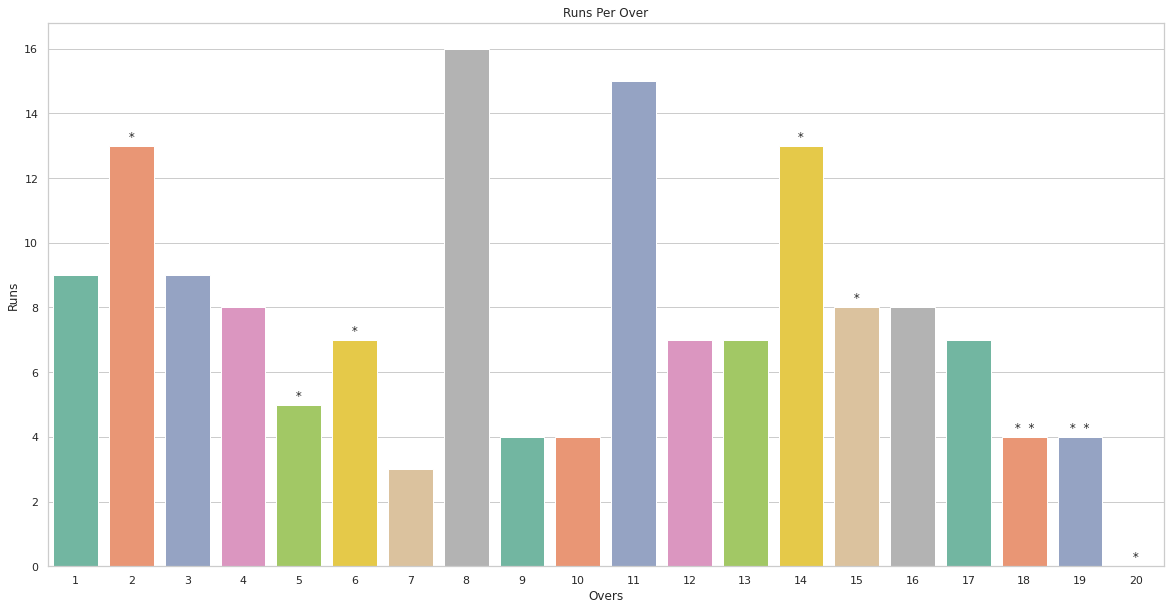

In [36]:
sns.set_theme(style="whitegrid")


ax = plt.figure(figsize=(20,10))

overs_stats_df = overs_stats_2
ax = sns.barplot(data = overs_stats_df, x = 'over', y = 'total_runs', palette= 'Set2')
#ax = sns.barplot(data = inn1_df, x = 'bowler', y = 'economy', color = 'y')

# for rate in inn1_df['strike_rate']:
#     ax.text(ax.patches.get_x(), inn1_df.runs+5,rate,color='black', ha='center')

for p, wickets in zip(ax.patches, overs_stats_df['player_dismissed']):
    ax.annotate(' * '*wickets, (p.get_x() + p.get_width() / 2.,p.get_height()),
               ha = 'center', va = 'center',xytext=(0,9),
               textcoords = 'offset points')

ax.set(xlabel = 'Overs',ylabel = 'Runs', title = 'Runs Per Over')

In [37]:
df1 = copy.deepcopy(inn_1['scorecard'][0])
df1['Team'] = 'Team 1'
df2 = copy.deepcopy(inn_2['scorecard'][0])
df2['Team'] = 'Team 2'
new_name = {'batsman': 'Batsman', 'runs': 'Runs Scored','ball': 'Balls Faced','strike_rate':'Strike Rate'}
batting_df = df1.merge(df2, how='outer')
batting_df.rename(columns = new_name, inplace=True)
batting_df.head()

,Batsman,Runs Scored,Balls Faced,Strike Rate,Team
0,GC Smith,2,7,28.57,Team 1
1,SA Asnodkar,60,34,176.47,Team 1
2,M Kaif,21,18,116.67,Team 1
3,YK Pathan,55,31,177.42,Team 1
4,SR Watson,0,1,0.00,Team 1


In [38]:
import plotly.express as px

# df = px.data. # iris is a pandas DataFrame
fig = px.scatter(batting_df, x="Balls Faced", y="Runs Scored",color = 'Team',size='Strike Rate',
                 title='Runs Scored V/S Balls Faced By Each Player',hover_data=['Batsman'])
#fig.set(xlabel='Balls Faced',ylabel = 'Runs Scored',title='BALLS V/S RUNS BY EACH PLAYER')
fig.show()

In [39]:
df1, df2 = copy.deepcopy(overs_stats_1), copy.deepcopy(overs_stats_2)
df1.rename(columns={'total_runs':'team1_runs','player_dismissed':'player_dismissed_1'}, inplace=True)
df2.rename(columns={'total_runs':'team2_runs','player_dismissed':'player_dismissed_2'}, inplace=True)
df = df1.merge(df2, how='outer',on='over')
df.fillna(0,inplace=True)

[Text(0, 0.5, 'Runs'), Text(0.5, 0, 'Overs'), Text(0.5, 1.0, 'MANHATTAN')]

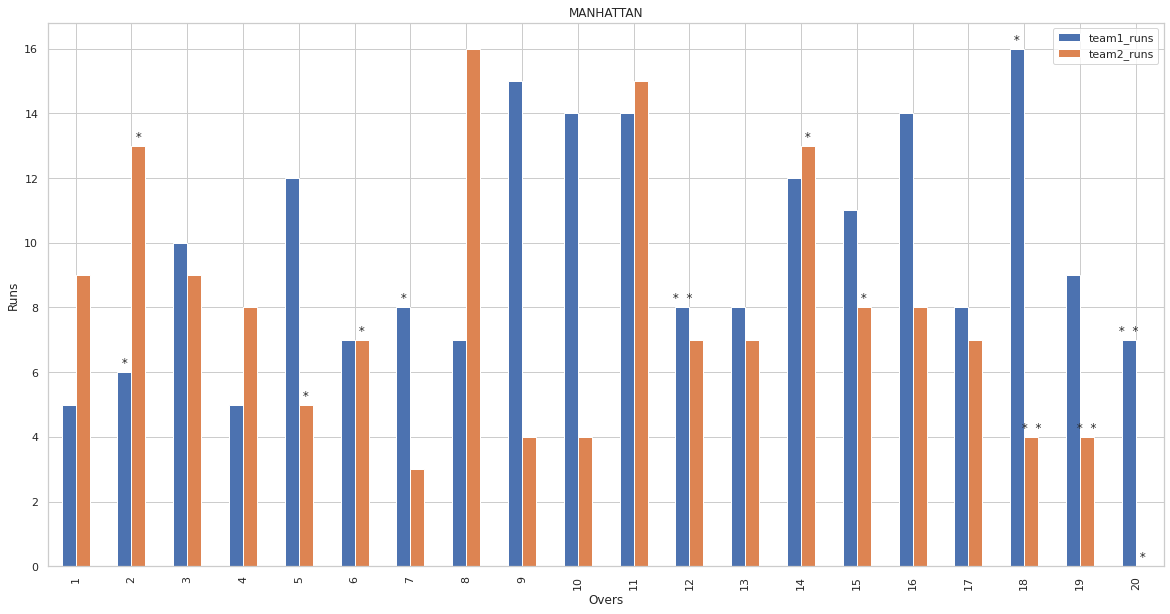

In [40]:
ax = df.plot(x='over',y=['team1_runs','team2_runs'],kind='bar',figsize=(20,10))


for p1,p2, w1,w2 in zip(ax.patches[:(len(ax.patches)//2)+1],ax.patches[len(ax.patches)//2:], df['player_dismissed_1'], df['player_dismissed_2']):
    ax.annotate(' * '*int(w1), (p1.get_x() + p1.get_width() / 2.,p1.get_height()),
               ha = 'center', va = 'center',xytext=(0,9),
               textcoords = 'offset points')
    ax.annotate(' * '*int(w2), (p2.get_x() + p2.get_width() / 2.,p2.get_height()),
               ha = 'center', va = 'center',xytext=(0,9),
               textcoords = 'offset points')
    
ax.set(xlabel='Overs',ylabel='Runs',title='MANHATTAN')

In [41]:
overs_stats_df_1 = copy.deepcopy(overs_stats_1)
overs_stats_df_2 = copy.deepcopy(overs_stats_2)

In [42]:
overs_stats_df_1['player_dismissed_at'] = [at if is_out==1 else np.nan for is_out, at in zip(overs_stats_df_1.player_dismissed, overs_stats_df_1.score)]
overs_stats_df_2['player_dismissed_at'] = [at if is_out==1 else np.nan for is_out, at in zip(overs_stats_df_2.player_dismissed, overs_stats_df_2.score)]

[Text(0, 0.5, 'Runs'), Text(0.5, 0, 'Overs'), Text(0.5, 1.0, 'Runs Per Over')]

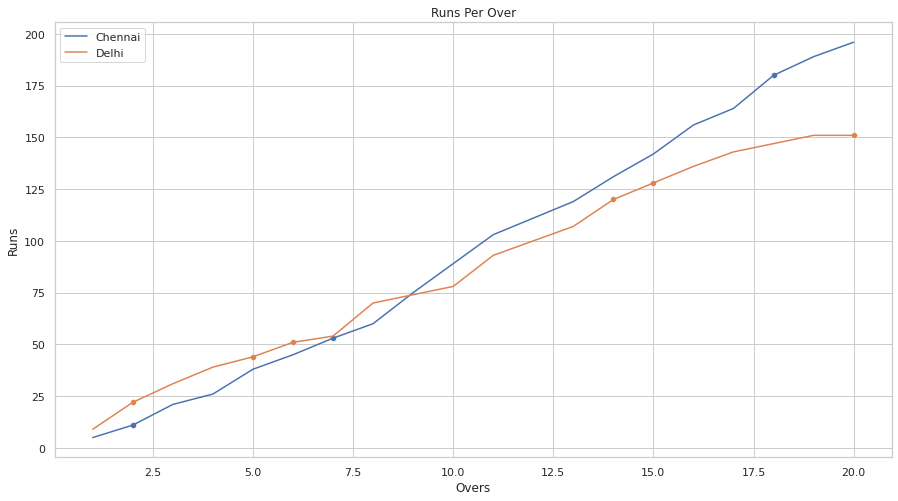

In [43]:
sns.set_theme(style="whitegrid")

ax = plt.figure(figsize=(15,8))

#marker = 'o',dashes=False, 
ax = sns.lineplot(data = overs_stats_df_1, x = 'over', y = 'score',label = 'Chennai')
ax = sns.lineplot(data = overs_stats_df_2, x = 'over', y = 'score',label = 'Delhi')
ax = sns.scatterplot(data = overs_stats_df_1, x='over', y= 'player_dismissed_at', marker = 'o')
ax = sns.scatterplot(data = overs_stats_df_2, x='over', y= 'player_dismissed_at', marker = 'o')


# for k in overs_stats_df_1['player_dismissed']:
#     if k == 28:
#         ax = sns.scatterplot(data = overs_stats_df_1, x='over', y= 'player_dismissed_at', marker = 'o') 

# for p, wickets in zip(ax.patches, overs_stats_df['player_dismissed']):
#     ax.annotate('kkkk', (p.get_x(),overs_stats_df_1['score']),
#                ha = 'center', va = 'center',xytext=(0,9),
#                textcoords = 'offset points')

ax.set(xlabel = 'Overs',ylabel = 'Runs', title = 'Runs Per Over')

In [44]:
print('#######'*4+'\n\tMATCH RESULT\n'+'\t'+'***'*4+'\n'+match_result)

############################
	MATCH RESULT
	************
Duckworth-Lewis-Stern Applied: No
Match Played between Rajasthan Royals and Kolkata Knight Riders
Rajasthan Royals wins the match by 45 runs



In [45]:
def get_points_df():
    df = matches_df[matches_df['Season']==season].iloc[:-2]
    df = df.groupby('winner').agg({'id':'count'}).rename(columns={'id':'matches_won'}).reset_index()
    points = [val*2 for val in df['matches_won']]
    team_points_df = pd.concat([df,pd.DataFrame({'points':points})],axis=1)
    team_points_df.rename(columns={'winner':'team_name'}, inplace=True)
    return team_points_df


def get_points_table(ipl_season):

    if ipl_season=='Select Season':
        print('Please select a season!')
        return None
    elif int(ipl_season) > 2019:
        print('Sorry, Data Not Avaliable!')
        return None
    ipl_season = int(ipl_season)
    print('\n\033[1mIPL Seaon:',ipl_season)

    global season
    season = ipl_season
    global points_df
    points_df = get_points_df()
    points_df.sort_values(by='points',ascending=False)
    return points_df

In [46]:
def get_team_stadium_win_lose(season, team_ground_win_lose_dict ):
  season_match_df = matches_df[matches_df['Season'] == season]
  for index, rows in season_match_df.iterrows():
    winner = rows['winner']
    loser = rows['team1'] if winner != rows['team1'] else rows['team2']
    venue = rows['venue']

    old_name_new_name_dict = {'Deccan Chargers' :'Sunrisers Hyderabad', 'Pune Warriors': 'Rising Pune Supergiants', 'Rising Pune Supergiant':'Rising Pune Supergiants','Delhi Daredevils':'Delhi Capitals'}
    old_stad_new_stad_dict = {'M Chinnaswamy Stadium':'M. Chinnaswamy Stadium', 'IS Bindra Stadium':'Punjab Cricket Association IS Bindra Stadium, Mohali','Punjab Cricket Association Stadium, Mohali':'Punjab Cricket Association IS Bindra Stadium, Mohali', 'Rajiv Gandhi Intl. Cricket Stadium':'Rajiv Gandhi International Stadium, Uppal', 'Feroz Shah Kotla':'Feroz Shah Kotla Ground'}

    if winner in old_name_new_name_dict:
      winner = old_name_new_name_dict[winner]
    if loser in old_name_new_name_dict:
      loser = old_name_new_name_dict[loser]

    if venue in old_stad_new_stad_dict:
      venue = old_stad_new_stad_dict[venue]

    if winner in team_ground_win_lose_dict:
    
      if venue in team_ground_win_lose_dict[winner]:
        team_ground_win_lose_dict[winner][venue][0] += 1 
      else:
        team_ground_win_lose_dict[winner][venue] = [1,0]  

    else:
      team_ground_win_lose_dict[winner] = {venue:[1,0]}

    if loser in team_ground_win_lose_dict:

      if venue in team_ground_win_lose_dict[loser]:
        team_ground_win_lose_dict[loser][venue][1] += 1 
      else:
        team_ground_win_lose_dict[loser][venue] =[0,1]  

    else:
      team_ground_win_lose_dict[loser] = {venue:[0,1]}
  

  return team_ground_win_lose_dict


In [47]:
def get_team_ground_analytics(season_team_ground_win_lose_dict):

  if np.nan in season_team_ground_win_lose_dict:
        season_team_ground_win_lose_dict.pop(np.nan)

  team_ground_win_dict = {}
  team_ground_lose_dict = {}
  team_ground_win_percent_dict = {}


  for team in season_team_ground_win_lose_dict:
    grounds_dict = season_team_ground_win_lose_dict[team]
  
    ground_win = grounds_dict.copy()
    ground_lose = grounds_dict.copy()
    ground_win_percent = grounds_dict.copy()
    ground_total_played = grounds_dict.copy()

    for ground in grounds_dict:
      
      win_lose = grounds_dict[ground]
      win_percent = round((win_lose[0]*100)/(win_lose[0]+win_lose[1]),2)
      ground_win[ground] = win_lose[0]
      ground_lose[ground] = win_lose[1]
      ground_win_percent[ground] = win_percent

    team_ground_win_dict[team] = ground_win
    team_ground_lose_dict[team] = ground_lose
    team_ground_win_percent_dict[team] = ground_win_percent

  return team_ground_win_dict, team_ground_lose_dict, team_ground_win_percent_dict



In [48]:
def plot_season_ground_win_matches():

    team_stadium_win_lose_dict = get_team_stadium_win_lose(season, team_ground_win_lose_dict ={})
    season_win_dict = get_team_ground_analytics(team_stadium_win_lose_dict)[0]
    #print(f'{team_stadium_win_lose_dict} {season_win_dict}')
    season_win_df = pd.DataFrame(season_win_dict)
    
    ax = season_win_df.set_index(season_win_df.index).plot(figsize=(18,8), kind='bar', title=f'Number of matches Won by teams on stadium in the year {season}', stacked=True, fontsize = 14)
    ax.set_title(f'Team Performance in {season}', fontdict={'fontsize': '25', 'fontweight' : 'bold'})
    plt.ylabel('Ground Name', fontsize=18)
    plt.xlabel('Number of Matches Won', fontsize=18)


def plot_season_ground_lose_matches():

    team_stadium_win_lose_dict = get_team_stadium_win_lose(season, team_ground_win_lose_dict ={})
    season_lose_dict = get_team_ground_analytics(team_stadium_win_lose_dict)[1]
    #print(f'{team_stadium_win_lose_dict} {season_lose_dict}')

    season_lose_df = pd.DataFrame(season_lose_dict)
    ax = season_lose_df.set_index(season_lose_df.index).plot(figsize=(18,8),kind='bar', title=f'Number of matches Lost by teams on stadium in the year {season}', stacked=True, fontsize = 14)
    ax.set_title(f'Team Performance in {season}', fontdict={'fontsize': '25', 'fontweight' : 'bold'})
    plt.ylabel('Ground Name', fontsize=18)
    plt.xlabel('Number of Matches Lost', fontsize=18)

In [49]:

def get_india_heat_map(map_df, column_name):
  fig, ax = plt.subplots(1, figsize=(13, 13))
  ax.axis('on')
  ax.set_title(f'Team Performance in {season}', fontdict={'fontsize': '25', 'fontweight' : 'bold'})
  map_df.plot(column=column_name, cmap='YlOrRd' ,linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
  ax.set_facecolor('skyblue')

def get_state( team_name):
  team_state_dict = {'Kochi Tuskers Kerala':'Kerala',
  'Gujarat Lions':'Gujarat',
  'Rising Pune Supergiant': 'Maharashtra',
  'Chennai Super Kings':'Tamil Nadu',
  'Rajasthan Royals':'Rajasthan',
  'Mumbai Indians':'Maharashtra',
  'Kings XI Punjab':'Punjab',
  'Sunrisers Hyderabad':'Telangana',
  'Kolkata Knight Riders':'West Bengal',
  'Royal Challengers Bangalore':'Karnataka',
  'Delhi Capitals':'NCT of Delhi' }

  return team_state_dict[team_name] if team_name in team_state_dict else np.nan


def get_district( team_name):
  team_city_dict = {'Kochi Tuskers Kerala':'Ernakulam',
  'Gujarat Lions':'Gujarat',
  'Rising Pune Supergiant': 'Pune',
  'Chennai Super Kings':'Chennai',
  'Rajasthan Royals':'Rajasthan',
  'Mumbai Indians':'Greater Bombay',
  'Kings XI Punjab':'Punjab',
  'Sunrisers Hyderabad':'Hyderabad',
  'Kolkata Knight Riders':'Kolkatsa',
  'Royal Challengers Bangalore':'Bangalore Urban',
  'Delhi Capital':'NCT of Delhi' }

  return team_city_dict[team_name] if team_name in team_city_dict else np.nan

def get_india_map_visualization(column_name):

    team_st_dict = {
        'Kochi Tuskers Kerala':'Kerala',
        'Rising Pune Supergiant': 'Maharashtra',
        'Chennai Super Kings':'Tamil Nadu',
        'Mumbai Indians':'Maharashtra',
        'Sunrisers Hyderabad':'Telangana',
        'Kolkata Knight Riders':'West Bengal',
        'Royal Challengers Bangalore':'Karnataka',
        }

    updated_points_state_df = points_df.copy()
    updated_points_district_df = points_df.copy()

    list_of_city = ['Pune','Ernakulam', 'Chennai', 'Greater Bombay', 'Hyderabad', 'Kolkata', 'Bangalore Urban']
    city_df = map_district_df[map_district_df['NAME_2'].isin(list_of_city)]

    updated_points_state_df['place_name'] = updated_points_state_df.apply(lambda x: get_state(x['team_name']), axis=1)
    updated_points_district_df['place_name'] = updated_points_district_df.apply(lambda x: get_district(x['team_name']) , axis=1)

    points_combined = pd.concat([ updated_points_district_df, updated_points_state_df], ignore_index=True)

    new_city_df = city_df[['NAME_2', 'geometry']].rename(columns= {'NAME_2':'st_nm'})
   
    map_combined = pd.concat([map_df, new_city_df])

    map_combined.rename(columns={'st_nm':'place_name'}, inplace = True)

    merged = map_combined.merge(points_combined, how='left', on='place_name').fillna(0)

    teams_new = [team_st_dict[i] for i in updated_points_district_df['team_name'] if i in team_st_dict.keys()]

    merged['points'] = merged.apply(lambda x:(x[4]-3) if x[0] in teams_new else x[4], axis = 1)
   
    index_names = merged[ (merged['place_name'].isin(list_of_city)) & (merged['points'] <= 0.0)].index
  
    merged.drop(index_names, inplace = True)

    get_india_heat_map(merged, 'points')



In [50]:
def get_team_stadium_win_lose(season, team_ground_win_lose_dict ):
  season_match_df = matches_df[matches_df['Season'] == season]
  for index, rows in season_match_df.iterrows():
    winner = rows['winner']
    loser = rows['team1'] if winner != rows['team1'] else rows['team2']
    venue = rows['venue']

    old_name_new_name_dict = {'Deccan Chargers' :'Sunrisers Hyderabad', 'Pune Warriors': 'Rising Pune Supergiants', 'Rising Pune Supergiant':'Rising Pune Supergiants','Delhi Daredevils':'Delhi Capitals'}
    old_stad_new_stad_dict = {'M Chinnaswamy Stadium':'M. Chinnaswamy Stadium', 'IS Bindra Stadium':'Punjab Cricket Association IS Bindra Stadium, Mohali','Punjab Cricket Association Stadium, Mohali':'Punjab Cricket Association IS Bindra Stadium, Mohali', 'Rajiv Gandhi Intl. Cricket Stadium':'Rajiv Gandhi International Stadium, Uppal', 'Feroz Shah Kotla':'Feroz Shah Kotla Ground'}

    if winner in old_name_new_name_dict:
      winner = old_name_new_name_dict[winner]
    if loser in old_name_new_name_dict:
      loser = old_name_new_name_dict[loser]

    if venue in old_stad_new_stad_dict:
      venue = old_stad_new_stad_dict[venue]

    if winner in team_ground_win_lose_dict:
    
      if venue in team_ground_win_lose_dict[winner]:
        team_ground_win_lose_dict[winner][venue][0] += 1 
      else:
        team_ground_win_lose_dict[winner][venue] = [1,0]  

    else:
      team_ground_win_lose_dict[winner] = {venue:[1,0]}

    if loser in team_ground_win_lose_dict:

      if venue in team_ground_win_lose_dict[loser]:
        team_ground_win_lose_dict[loser][venue][1] += 1 
      else:
        team_ground_win_lose_dict[loser][venue] =[0,1]  

    else:
      team_ground_win_lose_dict[loser] = {venue:[0,1]}
  

  return team_ground_win_lose_dict


In [51]:
def get_team_ground_analytics(season_team_ground_win_lose_dict):

  if np.nan in season_team_ground_win_lose_dict:
        season_team_ground_win_lose_dict.pop(np.nan)

  team_ground_win_dict = {}
  team_ground_lose_dict = {}
  team_ground_win_percent_dict = {}


  for team in season_team_ground_win_lose_dict:
    grounds_dict = season_team_ground_win_lose_dict[team]
  
    ground_win = grounds_dict.copy()
    ground_lose = grounds_dict.copy()
    ground_win_percent = grounds_dict.copy()
    ground_total_played = grounds_dict.copy()

    for ground in grounds_dict:
      
      win_lose = grounds_dict[ground]
      win_percent = round((win_lose[0]*100)/(win_lose[0]+win_lose[1]),2)
      ground_win[ground] = win_lose[0]
      ground_lose[ground] = win_lose[1]
      ground_win_percent[ground] = win_percent

    team_ground_win_dict[team] = ground_win
    team_ground_lose_dict[team] = ground_lose
    team_ground_win_percent_dict[team] = ground_win_percent

  return team_ground_win_dict, team_ground_lose_dict, team_ground_win_percent_dict



In [52]:
def get_team_stadium_win_loose(season, team_ground_win_loose_dict ):
  season_match_df = matches_df[matches_df['Season'] == season]
  for index, rows in season_match_df.iterrows():
    winner = rows['winner']
    loser = rows['team1'] if winner != rows['team1'] else rows['team2']
    venue = rows['venue']
    # print(rows)
    old_name_new_name_dict = {'Deccan Chargers' :'Sunrisers Hyderabad', 'Pune Warriors': 'Rising Pune Supergiants', 'Rising Pune Supergiant':'Rising Pune Supergiants','Delhi Daredevils':'Delhi Capitals'}
    old_stad_new_stad_dict = {'M Chinnaswamy Stadium':'M. Chinnaswamy Stadium', 'IS Bindra Stadium':'Punjab Cricket Association IS Bindra Stadium, Mohali','Punjab Cricket Association Stadium, Mohali':'Punjab Cricket Association IS Bindra Stadium, Mohali', 'Rajiv Gandhi Intl. Cricket Stadium':'Rajiv Gandhi International Stadium, Uppal', 'Feroz Shah Kotla':'Feroz Shah Kotla Ground'}

    if winner in old_name_new_name_dict:
      winner = old_name_new_name_dict[winner]
    if loser in old_name_new_name_dict:
      loser = old_name_new_name_dict[loser]

    if venue in old_stad_new_stad_dict:
      venue = old_stad_new_stad_dict[venue]

    if winner in team_ground_win_loose_dict:
    
      if venue in team_ground_win_loose_dict[winner]:
        team_ground_win_loose_dict[winner][venue][0] += 1 
      else:
        team_ground_win_loose_dict[winner][venue] = [1,0]  

    else:
      team_ground_win_loose_dict[winner] = {venue:[1,0]}

    if loser in team_ground_win_loose_dict:

      if venue in team_ground_win_loose_dict[loser]:
        team_ground_win_loose_dict[loser][venue][1] += 1 
      else:
        team_ground_win_loose_dict[loser][venue] =[0,1]  

    else:
      team_ground_win_loose_dict[loser] = {venue:[0,1]}
  

  return team_ground_win_loose_dict


So, We are looking into a particular season on which matches held, Now we want to know the lucky and the unlucky stadium for a team in that season. By lucky stadium we mean that the stadium in which a team won the max number of matches and by unlucky stadium we mean that the stadium in which the lost the max number of matches.

So to show those  grounds we plotted stacked bar graph between ground and teams and tried to show the number of matches won by teams on a particular ground  so by just looking into the stacked graph you can simply see that the biggest stack made by a team shows the maximum number of matches won by that team in that particular ground, and so that ground can be termed lucky for that team. 
For example: if you select season 2019, you will see that Delhi Capitals  won maximum matches on Feroz Shah Kotla ground and so you can say that this ground is  lucky for them.
Similarly we can analyze the unlucky stadium for the teams on any particular stadium, by looking into the second graph where we are showing the number of matches lost by a team in a particular stadium on that season.


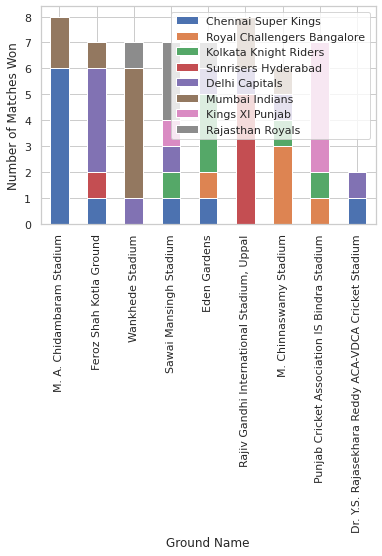

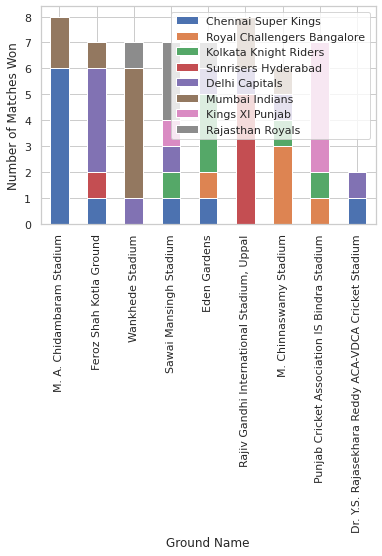

In [53]:
season = 'IPL-2019'
def plot_season_ground_win_matches():
    team_stadium_win_lose_dict = get_team_stadium_win_loose(season, team_ground_win_loose_dict ={})
    win_dict = get_team_ground_analytics(team_stadium_win_lose_dict)[0]

    win_df = pd.DataFrame(win_dict)
    win_df.set_index(win_df.index).plot(kind='bar', stacked=True, xlabel='Ground Name', ylabel='Number of Matches Won')

plot_season_ground_win_matches()

def plot_season_ground_lose_matches():
    team_stadium_win_loose_dict = get_team_stadium_win_lose(season, team_ground_win_loose_dict ={})
    win_dict = get_team_ground_analytics(d)[0]

    win_df = pd.DataFrame(win_dict)
    win_df.set_index(win_df.index).plot(kind='bar', stacked=True, xlabel='Ground Name', ylabel='Number of Matches Won')

plot_season_ground_win_matches()

In [54]:
def get_total_team_ground_win_loose_dict():
  season_teams_dict = {}
  seasons_arr = matches_df['Season'].unique()
  team_ground_win_loose_dict = {}
  
  for season in seasons_arr:
    team_win_loose_dict = get_team_stadium_win_loose(season, team_ground_win_loose_dict )
    season_teams_dict[season] = team_win_loose_dict

  return team_ground_win_loose_dict


In [55]:

def get_team_ground_analytics(total_team_ground_win_loose_dict):
  # total_team_ground_win_loose_dict = get_total_team_ground_win_loose_dict()
  if np.nan in total_team_ground_win_loose_dict:
    total_team_ground_win_loose_dict.pop(np.nan)
  team_ground_win_dict = {}
  team_ground_loose_dict = {}
  team_ground_win_percent_dict = {}


  for team in total_team_ground_win_loose_dict:
    grounds_dict = total_team_ground_win_loose_dict[team]
  
    ground_win = grounds_dict.copy()
    ground_loose = grounds_dict.copy()
    ground_win_percent = grounds_dict.copy()
    ground_total_played = grounds_dict.copy()

    for ground in grounds_dict:
      
      win_loose = grounds_dict[ground]
      win_percent = round((win_loose[0]*100)/(win_loose[0]+win_loose[1]),2)
      ground_win[ground] = win_loose[0]
      ground_loose[ground] = win_loose[1]
      ground_win_percent[ground] = win_percent

    team_ground_win_dict[team] = ground_win
    team_ground_loose_dict[team] = ground_loose
    team_ground_win_percent_dict[team] = ground_win_percent

  return team_ground_win_dict, team_ground_loose_dict, team_ground_win_percent_dict



In [56]:
total_team_ground_win_loose_dict = get_total_team_ground_win_loose_dict()

win_dict = get_team_ground_analytics(total_team_ground_win_loose_dict)[0]
loose_dict = get_team_ground_analytics(total_team_ground_win_loose_dict)[1]
win_percent_dict= get_team_ground_analytics(total_team_ground_win_loose_dict)[2]

win_df = pd.DataFrame(win_dict)
loose_df = pd.DataFrame(loose_dict)
win_percent_df = pd.DataFrame(win_percent_dict)

win_dict

{'Chennai Super Kings': {'Barabati Stadium': 0,
  'Brabourne Stadium': 1,
  'Buffalo Park': 1,
  'De Beers Diamond Oval': 1,
  'Dr DY Patil Sports Academy': 3,
  'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium': 2,
  'Dubai International Cricket Stadium': 2,
  'Eden Gardens': 5,
  'Feroz Shah Kotla Ground': 6,
  'Himachal Pradesh Cricket Association Stadium': 1,
  'JSCA International Stadium Complex': 3,
  'Kingsmead': 1,
  'M. A. Chidambaram Stadium': 40,
  'M. Chinnaswamy Stadium': 5,
  'Maharashtra Cricket Association Stadium': 6,
  'Nehru Stadium': 0,
  'New Wanderers Stadium': 1,
  'Newlands': 0,
  'Punjab Cricket Association IS Bindra Stadium': 3,
  'Rajiv Gandhi International Stadium, Uppal': 3,
  'Sardar Patel Stadium, Motera': 0,
  'Sawai Mansingh Stadium': 3,
  'Shaheed Veer Narayan Singh International Stadium': 0,
  'Sharjah Cricket Stadium': 1,
  'Sheikh Zayed Stadium': 1,
  "St George's Park": 2,
  'SuperSport Park': 2,
  'Vidarbha Cricket Association Stadium, Jamtha'

Now we are looking into the entire IPL history and showing the number of matches won by a team in any stadium. For that we placed grounds on x-axis and the number of matches won on y-axis, and assigned different colors to teams. Now just by looking into the size of stack you can tell which ground a team won the maximum number of matches over entire IPL history. We did the same work to understand the number for teams who lost in any ground.



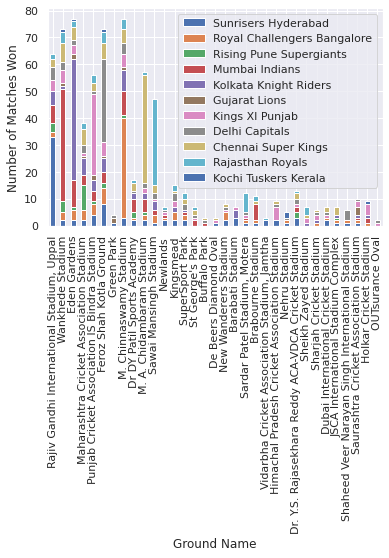

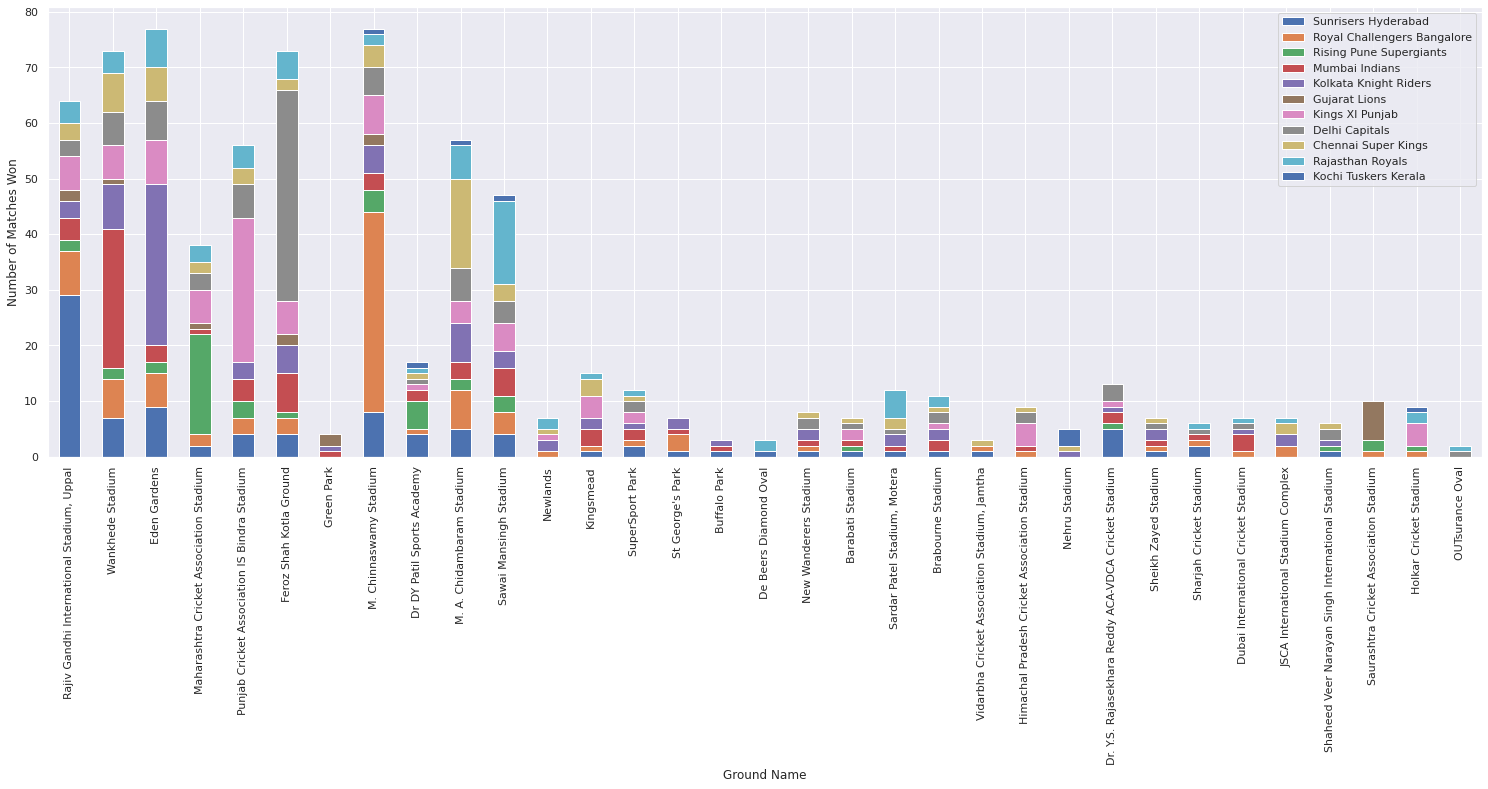

In [57]:
sns.set()
win_df.set_index(win_df.index).plot(kind='bar', stacked=True, xlabel='Ground Name', ylabel='Number of Matches Won')
sns.set(rc={'figure.figsize':(25.7,8.27)})

loose_df.set_index(win_df.index).plot(kind='bar', stacked=True, xlabel='Ground Name', ylabel='Number of Matches Won')


In [58]:
list_of_team_ground_win =[]
list_of_team_ground_loose =[]
list_of_team_ground_win_percent =[]


for index, item in win_df.iteritems():
  if win_df[index].dtype != 'object' and win_df[index].dtype != 'object' :
    list_of_team_ground_win.append({'team':index, 'ground':win_df[index].idxmax(), 'matches_won':item.max()})


for index, item in loose_df.iteritems():
  if loose_df[index].dtype != 'object' and loose_df[index].dtype != 'object' :
    list_of_team_ground_loose.append({'team':index, 'ground':loose_df[index].idxmax(), 'matches_loose':item.max()})


for index, item in win_percent_df.iteritems():
  if win_percent_df[index].dtype != 'object' and win_percent_df[index].dtype != 'object' :
    list_of_team_ground_win_percent.append({'team':index, 'ground':win_percent_df[index].idxmax(), 'matches_won':item.max()})




team_ground_win_df = pd.DataFrame(list_of_team_ground_win).sort_values(by = 'matches_won')
team_ground_loose_df = pd.DataFrame(list_of_team_ground_loose).sort_values(by = 'matches_loose')
team_ground_win_percent_df = pd.DataFrame(list_of_team_ground_win_percent).sort_values(by = 'matches_won')

team_ground_win_df.sort_values(by = 'matches_won')
team_ground_loose_df.sort_values(by = 'matches_loose')
# team_ground_win_percent_df.sort_values(by = 'matches_won')


,team,ground,matches_loose
10,Kochi Tuskers Kerala,Nehru Stadium,3.0
5,Gujarat Lions,Saurashtra Cricket Association Stadium,7.0
9,Rajasthan Royals,Sawai Mansingh Stadium,15.0
8,Chennai Super Kings,M. A. Chidambaram Stadium,16.0
2,Rising Pune Supergiants,Maharashtra Cricket Association Stadium,18.0
3,Mumbai Indians,Wankhede Stadium,25.0
6,Kings XI Punjab,Punjab Cricket Association IS Bindra Stadium,26.0
0,Sunrisers Hyderabad,"Rajiv Gandhi International Stadium, Uppal",29.0
4,Kolkata Knight Riders,Eden Gardens,29.0
1,Royal Challengers Bangalore,M. Chinnaswamy Stadium,36.0


Here we are showing that on which ground is lucky for which team. For that we take out the maximum number of matches a team won in which ground and declared that ground as lucky ground for the team over the entire IPL lifespan.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

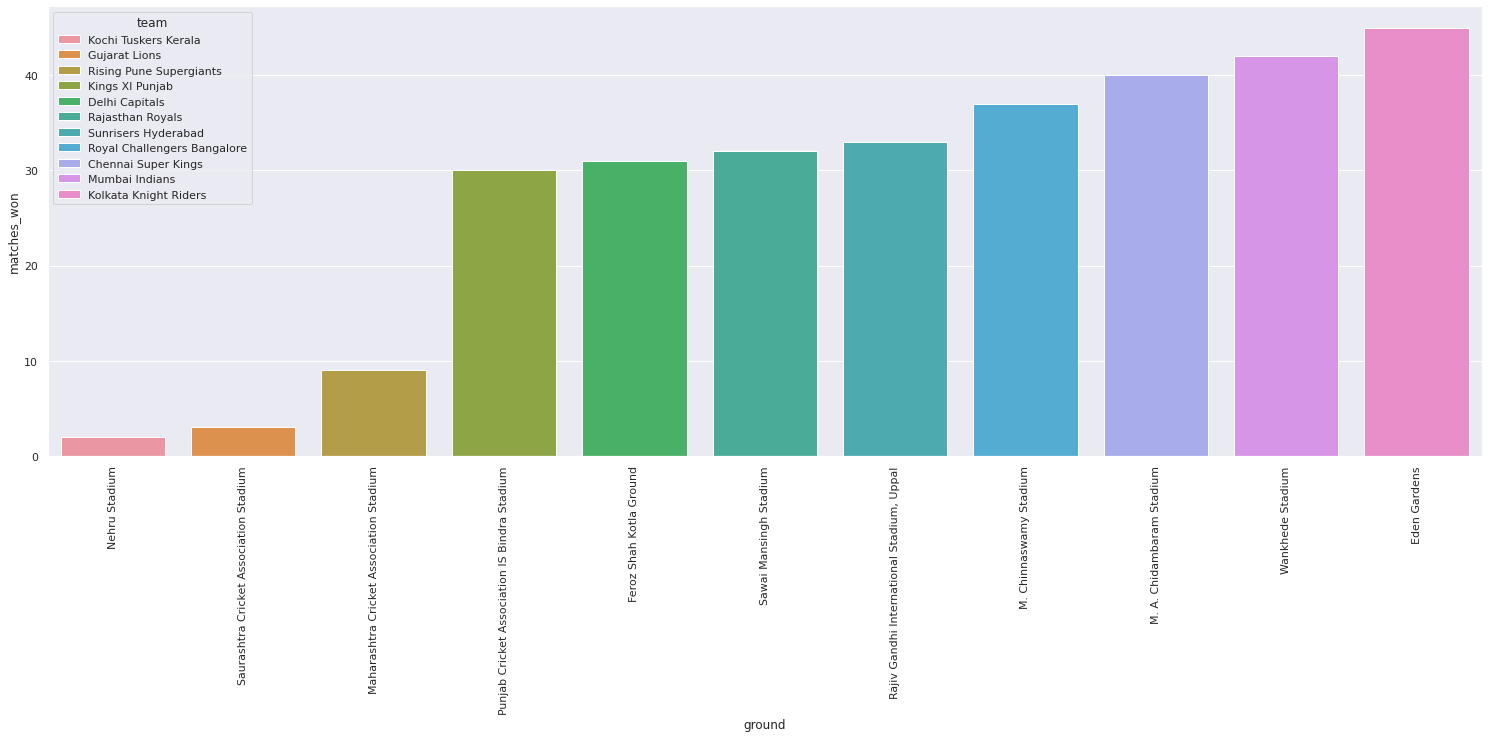

In [59]:
sns.set()
sns.barplot(data = team_ground_win_df,  x='ground', y = 'matches_won', hue = 'team', dodge = False)
plt.xticks(rotation=90)



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

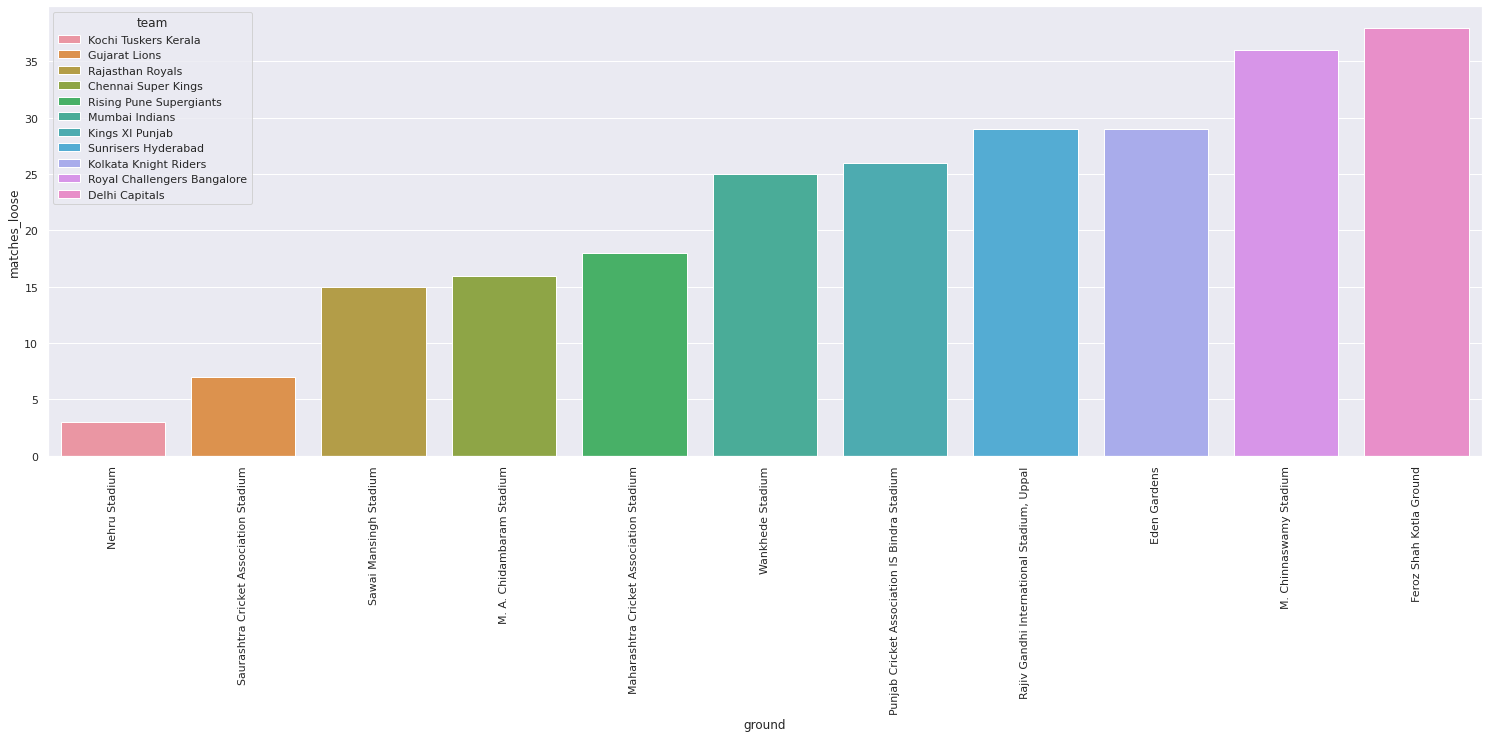

In [60]:
sns.set()
sns.barplot(data = team_ground_loose_df,  x='ground', y = 'matches_loose', hue = 'team', dodge = False)
plt.xticks(rotation=90)

In [61]:

# bb = matches_df.groupby(by='venue').agg('count')

# sns.barplot(bb )
# bb

In [63]:
def get_state( team_name):
  team_state_dict = {'Kochi Tuskers Kerala':'Kerala',
  'Gujarat Lions	Saurashtra':'Gujarat',
  'Rising Pune Supergiants': 'Maharashtra',
  'Chennai Super Kings':'Tamil Nadu',
  'Rajasthan Royals':'Rajasthan',
  'Mumbai Indians':'Maharashtra',
  'Kings XI Punjab':'Punjab',
  'Sunrisers Hyderabad':'Telangana',
  'Kolkata Knight Riders':'West Bengal',
  'Royal Challengers Bangalore':'Karnataka',
  'Delhi Capital':'Delhi' }

  return team_state_dict[team_name] if team_name in team_state_dict else np.nan



In [64]:
po = {'winner':['Kochi Tuskers Kerala', 'Rising Pune Supergiants'], 'points':[1,2], 'matches_won':[2,4]}
podf = pd.DataFrame(po)

podf['state_name'] = podf.apply(lambda x: get_state(x['winner']), axis=1)
podf

,winner,points,matches_won,state_name
0,Kochi Tuskers Kerala,1,2,Kerala
1,Rising Pune Supergiants,2,4,Maharashtra


In [65]:
# comment by ankit bansal
def get_india_heat_map(map_df, column_name, ipl_season):
  fig, ax = plt.subplots(1, figsize=(13, 13))
  ax.axis('on')
  ax.set_title(f'Team Performance in {ipl_season}', fontdict={'fontsize': '25', 'fontweight' : '3'})
  map_df.plot(column=column_name, cmap='YlOrRd' ,linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
  # plt.colorbar()
  ax.set_facecolor('skyblue')
  # ax.xaxis.label.set_color('red')

In [66]:

def get_india_map_visualization(points_df, column_name, ipl_season):
  updated_points_df = points_df.copy()
  updated_points_df['state_name'] = updated_points_df.apply(lambda x: get_state(x['winner']), axis=1)

  merged = map_df.set_index('st_nm').join(updated_points_df.set_index('state_name')).fillna(0)
  get_india_heat_map(merged, column_name, ipl_season)

In [67]:
def get_points_table(season):
 df = matches_df[matches_df['Season']==season].iloc[:-2]
 df = df.groupby('winner').agg({'id':'count'}).rename(columns={'id':'Matches_won'}).reset_index()
 points = [val*2 for val in df['Matches_won']]
 return pd.concat([df,pd.DataFrame({'Points':points})],axis=1)

In [68]:
season = 'IPL-2019'
Points_df = get_points_table(season)
Points_df.sort_values(by='Points',ascending=False)

,winner,Matches_won,Points
1,Delhi Capitals,10,20
4,Mumbai Indians,10,20
0,Chennai Super Kings,9,18
2,Kings XI Punjab,6,12
3,Kolkata Knight Riders,6,12
7,Sunrisers Hyderabad,6,12
5,Rajasthan Royals,5,10
6,Royal Challengers Bangalore,5,10


This heat map is very close to our heart because of two reasons: 
1. It looks beautifull.
2. It took maximum time to implement, specially those small district boundaries took a lot of our time.

We have shown a dataframe which shows the points made by teams in an ipl season. Now to visualize  it we became a bit creative and plotted the heat map on Indian map and for that we use geopandas to read shp files which contains the geometry column, this geometry column contains the polygon of longitude and latitude which is used to make the graph. We have a challenge to show only city of few teams whose name doesn't belongs to a state (like chennai super kings) but at the same time we wanted to show the state for other teams, so to achieve that we used two different data files: one for states and other for cities. We took only those cities whose team is playing in IPL and ignored other.

Then we plotted the graph that you are seeing below.




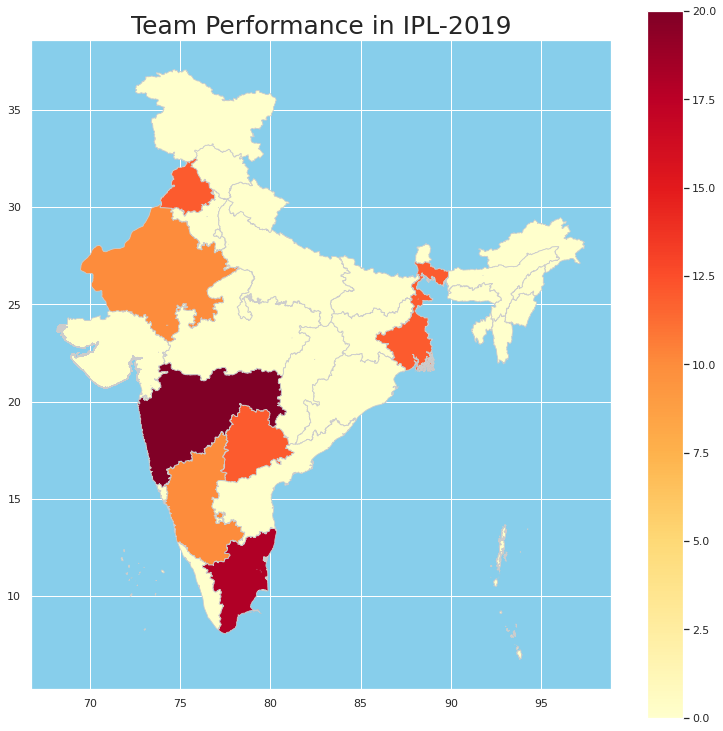

In [69]:
get_india_map_visualization(Points_df, 'Points', 'IPL-2019')


In [70]:
map_df

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."
5,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627..."
6,Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650..."
7,Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20..."
8,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14..."
9,Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20..."


KeyError: ignored

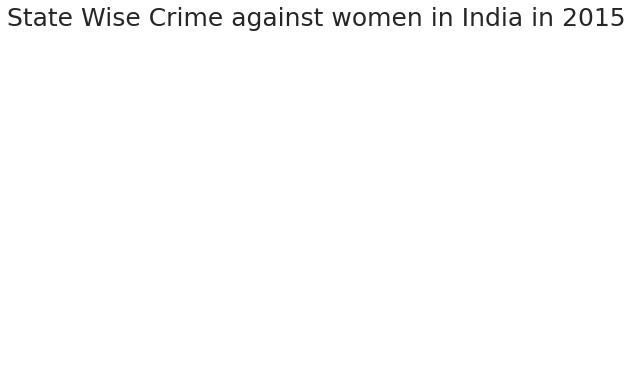

In [71]:
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('State Wise Crime against women in India in 2015', fontdict={'fontsize': '25', 'fontweight' : '3'})
map_df.plot(column='count', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)


In [ ]:
import plotly.express as px

# df = px.data. # iris is a pandas DataFrame
fig = px.scatter(season_team_df, x="Balls Faced", y="Runs Scored",color = 'Team',size='Strike Rate',
                 title='Runs Scored V/S Balls Faced By Each Player',hover_data=['Batsman'])
#fig.set(xlabel='Balls Faced',ylabel = 'Runs Scored',title='BALLS V/S RUNS BY EACH PLAYER')
fig.show()

# **Changes Made By Bhwesh: 04 May**

### Fill NaN values of matches_df['city']
    matches_df['city'].fillna('Dubai', inplace=True)
    matches_df.info()

### Incomplete Data:

> Match ID: 301, 546, 571, 11340
    
### Drop incomplete data from matches_df:
    drop_index = matches_df[matches_df.winner.isna()].index
    matches_df.drop(index=drop_index, inplace=True)
    matches_df.shape

### Drop incomplete data from deliveries_df:
    for index in drop_index:
    drop_index_for_deliveries_df = deliveries_df[deliveries_df.match_id == index+1].index 
    deliveries_df.drop(index=drop_index_for_deliveries_df, inplace =True)
    deliveries_df.shape

In [ ]:
most_runs_avg_sr_df.head(2)

In [ ]:
most_runs_avg_sr_df.fillna(0)